# Fake News Detection 
### TfidfVectorizer
* Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.



#### Library necessary imports 

In [45]:
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [46]:
df= pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Data exploration
    is an approach similar to initial data analysis, whereby a data analyst uses visual exploration to understand what is in a dataset and the characteristics of the data, rather than through traditional data management systems

In [47]:
# create label
df1=df.replace({"label":{"FAKE":0}})
df2=df1.replace({"label":{"REAL":1}})

In [48]:
df2.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",0
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",0
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,1
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,1
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,1


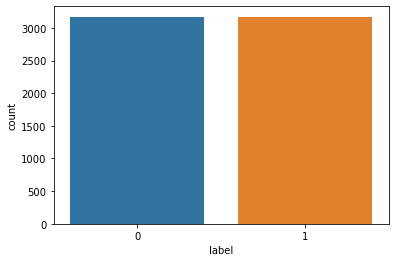

In [49]:
sn.countplot(df2.label)

In [50]:
con=df2["label"].value_counts()
con

1    3171
0    3164
Name: label, dtype: int64

In [51]:
df2.label.unique()

array([0, 1], dtype=int64)

In [52]:
df2 = pd.DataFrame(df2['text'])

In [55]:
import string,re
def clean_data(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('http\S+\s*', '', text)  # remove URLs
    text = re.sub('[0-9]+', '', text)
    text = re.sub('RT|cc', '', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  # remove punctuations
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    emoji_clear_data = text.encode('ascii', 'ignore').decode('ascii')
    text = emoji_clear_data
    return text

df2['clean_text'] = df2['text'].apply(lambda x: clean_data(x))
df2.head()

,text,clean_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",Daniel Greenfield a Shillman Journalism Fellow...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,US Secretary of State John F Kerry said Monday...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",Kaydee King KaydeeKing November The lesson fr...
4,It's primary day in New York and front-runners...,Its primary day in New York and frontrunners H...


In [5]:
df["title"][1:3]

1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
Name: title, dtype: object